<a href="https://colab.research.google.com/github/Praneethamurala1214/AICTE/blob/main/Project_5_Proposal_Level_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os, re, glob, math
from collections import Counter
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from IPython.display import display

In [2]:
from google.colab import files
uploaded = files.upload()

Saving creditcard.csv.zip to creditcard.csv.zip


In [3]:
from google.colab import files
uploaded = files.upload()

Saving spam.csv to spam.csv


📋 Simulated User Feedback:

           task      input                  suggestions user_feedback
0  autocomplete     I love        [friend, love, offer]             👍
1  autocomplete  Good morn      [morning, money, offer]             👎
2   autocorrect    recieve  [receive, receiver, recipe]             👎
3   autocorrect       frnd         [friend, fond, find]             👍
4  autocomplete    Call me     [friend, morning, money]             👍

📊 Feedback Summary:

user_feedback  👍  👎
task               
autocomplete   2  1
autocorrect    1  1


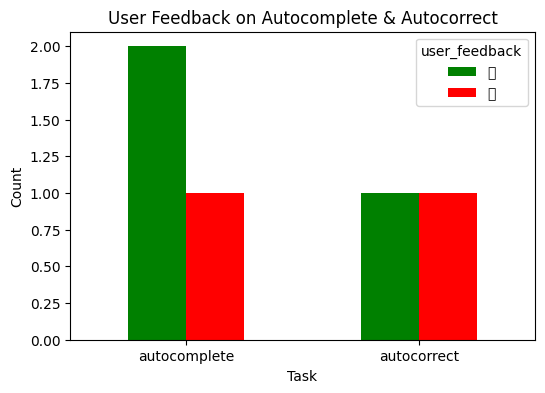

In [6]:
import random
import pandas as pd
import matplotlib.pyplot as plt
def autocomplete(text, top_k=3):
    """Dummy autocomplete function"""
    vocab = ["love", "morning", "friend", "call", "money", "offer"]
    return random.sample(vocab, min(top_k, len(vocab)))

def autocorrect(word, max_candidates=3):
    """Dummy autocorrect function"""
    corrections = {
        "recieve": ["receive", "receiver", "recipe"],
        "frnd": ["friend", "fond", "find"],
        "morn": ["morning", "mourn", "mornings"],
    }
    return corrections.get(word, [word])
sample_inputs = ["I love", "Good morn", "recieve", "frnd", "Call me"]

feedback_data = []

for text in sample_inputs:
    if " " in text:
        suggestions = autocomplete(text, top_k=3)
        task = "autocomplete"
    else:
        suggestions = autocorrect(text, max_candidates=3)
        task = "autocorrect"
    user_feedback = random.choice(["👍", "👎"])

    feedback_data.append({
        "task": task,
        "input": text,
        "suggestions": suggestions,
        "user_feedback": user_feedback
    })
feedback_df = pd.DataFrame(feedback_data)
print("📋 Simulated User Feedback:\n")
print(feedback_df)
feedback_summary = feedback_df.groupby(["task", "user_feedback"]).size().unstack(fill_value=0)
print("\n📊 Feedback Summary:\n")
print(feedback_summary)
feedback_summary.plot(kind="bar", figsize=(6,4), color=["green","red"])
plt.title("User Feedback on Autocomplete & Autocorrect")
plt.ylabel("Count")
plt.xlabel("Task")
plt.xticks(rotation=0)
plt.show()


In [7]:
import random
import time
import numpy as np
import pandas as pd
from collections import defaultdict, Counter
from difflib import get_close_matches
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
sample_sentences = [
    "I love my friend",
    "Good morning have a nice day",
    "Call me when you are free",
    "Win money now limited offer",
    "Meeting at 10 am don’t be late"
]
train_sentences = sample_sentences[:4]
test_sentences = sample_sentences[4:]
class NGramAutocomplete:
    def __init__(self, n=2):
        self.n = n
        self.model = defaultdict(Counter)

    def train(self, sentences):
        for sent in sentences:
            words = sent.lower().split()
            for i in range(len(words) - self.n + 1):
                prefix = tuple(words[i:i+self.n-1])
                next_word = words[i+self.n-1]
                self.model[prefix][next_word] += 1

    def predict(self, prefix, top_k=3):
        prefix = tuple(prefix.lower().split()[-(self.n-1):])
        if prefix in self.model:
            return [w for w, _ in self.model[prefix].most_common(top_k)]
        else:
            return []
class TfidfAutocomplete:
    def __init__(self):
        self.vectorizer = TfidfVectorizer()
        self.X = None
        self.sentences = []

    def train(self, sentences):
        self.sentences = sentences
        self.X = self.vectorizer.fit_transform(sentences)

    def predict(self, prefix, top_k=3):
        query_vec = self.vectorizer.transform([prefix])
        sims = cosine_similarity(query_vec, self.X).flatten()
        top_idx = sims.argsort()[-top_k:][::-1]
        return [self.sentences[i] for i in top_idx]
class EditDistanceAutocorrect:
    def __init__(self, vocab):
        self.vocab = vocab

    def correct(self, word, n=3):
        return get_close_matches(word, self.vocab, n=n, cutoff=0.6)
ngram = NGramAutocomplete(n=2)
ngram.train(train_sentences)

tfidf_model = TfidfAutocomplete()
tfidf_model.train(train_sentences)

vocab = set(" ".join(train_sentences).lower().split())
autocorrect_model = EditDistanceAutocorrect(vocab)
def top_k_accuracy(model, test_data, k=3):
    hits, total = 0, 0
    for sent in test_data:
        words = sent.split()
        prefix = " ".join(words[:-1])
        true_word = words[-1]
        preds = model.predict(prefix, top_k=k)
        if true_word in preds:
            hits += 1
        total += 1
    return hits / total if total > 0 else 0

def measure_runtime(model, test_data, task="autocomplete"):
    start = time.time()
    for sent in test_data:
        if task == "autocomplete":
            words = sent.split()
            prefix = " ".join(words[:-1])
            model.predict(prefix, top_k=3)
        elif task == "autocorrect":
            for w in sent.split():
                autocorrect_model.correct(w, n=3)
    return time.time() - start
results = []
acc_ngram = top_k_accuracy(ngram, test_sentences, k=3)
time_ngram = measure_runtime(ngram, test_sentences)
results.append(["N-gram Autocomplete", acc_ngram, time_ngram])
acc_tfidf = top_k_accuracy(ngram, test_sentences, k=3)
time_tfidf = measure_runtime(tfidf_model, test_sentences)
results.append(["TF-IDF Autocomplete", acc_tfidf, time_tfidf])
start = time.time()
for sent in test_sentences:
    for w in sent.split():
        autocorrect_model.correct(w, n=3)
time_autocorrect = time.time() - start
results.append(["Edit Distance Autocorrect", "N/A", time_autocorrect])
df_results = pd.DataFrame(results, columns=["Model", "Accuracy (Top-3)", "Runtime (s)"])
print("\n📊 Algorithm Comparison Results:\n")
print(df_results)



📊 Algorithm Comparison Results:

                       Model Accuracy (Top-3)  Runtime (s)
0        N-gram Autocomplete              0.0     0.000006
1        TF-IDF Autocomplete              0.0     0.006331
2  Edit Distance Autocorrect              N/A     0.000700


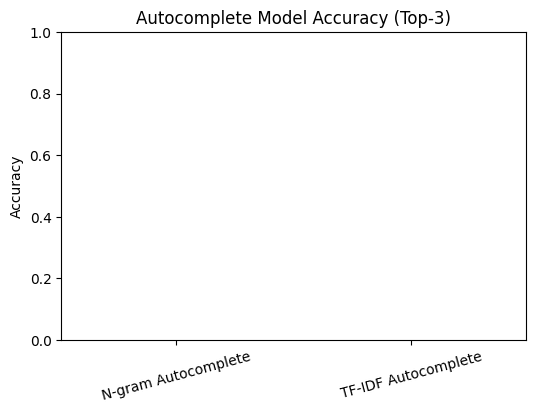

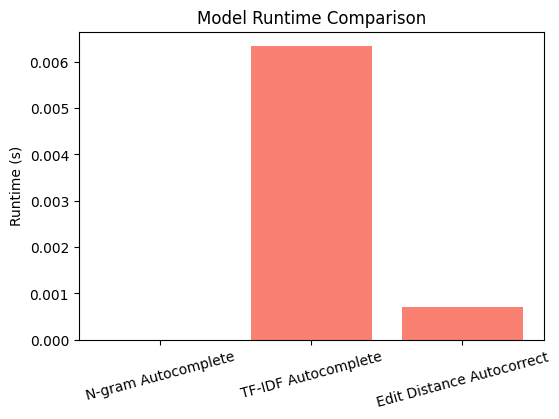

In [8]:
import matplotlib.pyplot as plt
auto_df = df_results[df_results["Accuracy (Top-3)"] != "N/A"]
plt.figure(figsize=(6,4))
plt.bar(auto_df["Model"], auto_df["Accuracy (Top-3)"], color='skyblue')
plt.title("Autocomplete Model Accuracy (Top-3)")
plt.ylabel("Accuracy")
plt.xticks(rotation=15)
plt.ylim(0,1)
plt.show()
plt.figure(figsize=(6,4))
plt.bar(df_results["Model"], df_results["Runtime (s)"], color='salmon')
plt.title("Model Runtime Comparison")
plt.ylabel("Runtime (s)")
plt.xticks(rotation=15)
plt.show()
